<a href="https://colab.research.google.com/github/gunelatakishyeva/Deep-Learning-Projects/blob/main/Copy_of_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris(as_frame=True)
X=iris.data[['petal length (cm)','petal width (cm)']].values
y=(iris.target==0)

per_clf=Perceptron(random_state=42)
per_clf.fit(X,y)

X_new=[[2,0.5],[3,1]]
y_pred=per_clf.predict(X_new)



In [ ]:
y_pred

array([ True, False])

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(loss='perceptron',penalty=None,
                      learning_rate='constant',eta0=1,random_state=42)
sgd_clf.fit(X,y)
assert(sgd_clf.coef_==per_clf.coef_).all()
assert(sgd_clf.intercept_==per_clf.intercept_).all()

In [ ]:
sgd_clf.intercept_==per_clf.intercept_

array([ True])

In [ ]:
import tensorflow as tf
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist
(X_train,y_train)=X_train_full[:-5000],y_train_full[:-5000]
(X_valid,y_valid)=X_train_full[-5000:],y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train,X_valid,X_test=X_train/255.0,X_valid/255.0,X_test/255.0

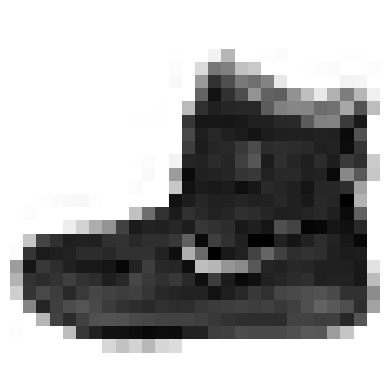

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
class_names[y_train[0]]

'Ankle boot'

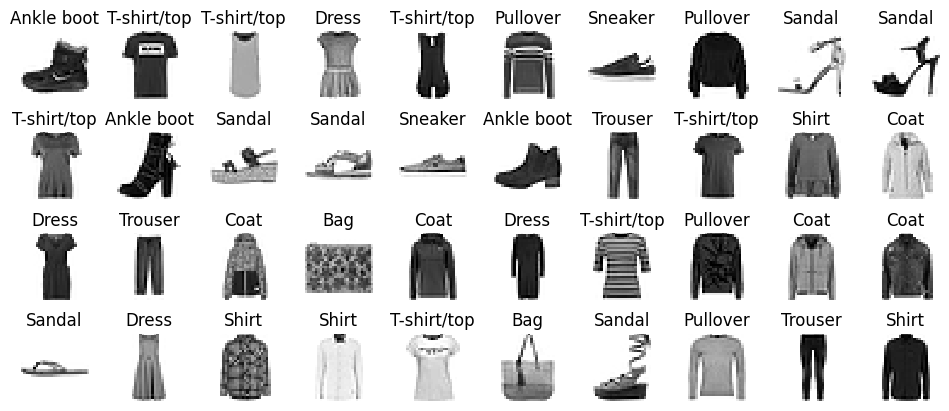

In [ ]:
n_rows = 4
n_cols = 10

plt.figure(figsize = (n_cols *1.2, n_rows * 1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols*row+col
    plt.subplot(n_rows,n_cols,index+1)
    plt.imshow(X_train[index],cmap="binary",interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace = 0.2 ,hspace = 0.5)
plt.show()

In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
    ])

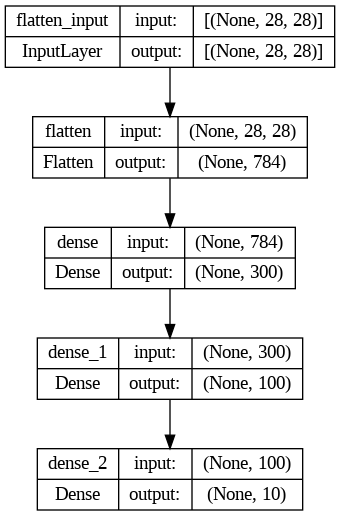

In [ ]:
tf.keras.utils.plot_model(model,'my_fashion_mnist_model.png',show_shapes=True)

In [ ]:
model.layers

In [ ]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [ ]:
weights,biases=hidden1.get_weights()
weights

array([[ 0.01759363, -0.02626174, -0.04857419, ...,  0.0304993 ,
         0.05987106,  0.04730636],
       [ 0.05075431,  0.03694316,  0.04064418, ..., -0.06642462,
         0.06686114, -0.0726048 ],
       [-0.06733454, -0.04095642, -0.06338574, ..., -0.06874392,
        -0.00303333, -0.03428677],
       ...,
       [-0.01765152,  0.06896828, -0.01183849, ..., -0.01622035,
         0.03492983, -0.0174869 ],
       [-0.03020029,  0.01547574,  0.05687404, ...,  0.05104852,
        -0.03270121, -0.02489621],
       [ 0.04061351, -0.02020084, -0.0666287 , ..., -0.02313014,
         0.01478938, -0.05493869]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#Compiling the model

In [ ]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [ ]:
tf.keras.utils.to_categorical([0,5,1,0],num_classes=10) #sparse to categorical

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
          axis=1)

array([0, 5, 1, 0])

#Training and Evaluating the model

In [ ]:
history=model.fit(X_train,y_train,epochs=30,
                  validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 18s 9ms/step - loss: 0.7270 - sparse_categorical_accuracy: 0.7633 - val_loss: 0.5056 - val_sparse_categorical_accuracy: 0.8270
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4879 - sparse_categorical_accuracy: 0.8300 - val_loss: 0.4589 - val_sparse_categorical_accuracy: 0.8356
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4420 - sparse_categorical_accuracy: 0.8444 - val_loss: 0.4251 - val_sparse_categorical_accuracy: 0.8506
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4171 - sparse_categorical_accuracy: 0.8527 - val_loss: 0.3962 - val_sparse_categorical_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3959 - sparse_categorical_accuracy: 0.8601 - val_loss: 0.3932 - val_sparse_categorical_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3798 - sp

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
history.history

{'loss': [0.7269793748855591,
  0.4878702163696289,
  0.4419568181037903,
  0.41712823510169983,
  0.395894318819046,
  0.37975531816482544,
  0.36739587783813477,
  0.3558090925216675,
  0.34457674622535706,
  0.3346560001373291,
  0.3261983394622803,
  0.31800806522369385,
  0.310507208108902,
  0.3033263087272644,
  0.29742303490638733,
  0.29051682353019714,
  0.2851406931877136,
  0.2790060043334961,
  0.274672269821167,
  0.2693670690059662,
  0.263894647359848,
  0.2590456008911133,
  0.25477728247642517,
  0.24993078410625458,
  0.24529391527175903,
  0.24217940866947174,
  0.23659338057041168,
  0.23360343277454376,
  0.2298283576965332,
  0.22613461315631866],
 'sparse_categorical_accuracy': [0.7632727026939392,
  0.8299999833106995,
  0.8444363474845886,
  0.8526727557182312,
  0.8600727319717407,
  0.8656181693077087,
  0.8688545227050781,
  0.8736545443534851,
  0.8774181604385376,
  0.8800727128982544,
  0.8831454515457153,
  0.8851818442344666,
  0.8898545503616333,
  0.

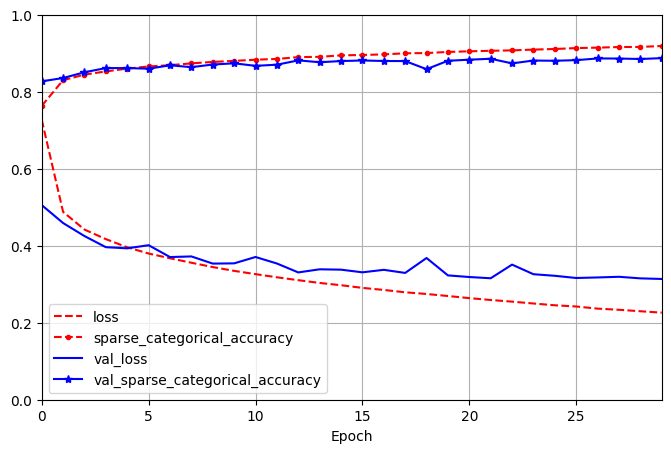

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel='Epoch',
    style=['r--','r--.','b-','b-*']
)
plt.legend(loc='lower left')
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3310 - sparse_categorical_accuracy: 0.8849


[0.330964595079422, 0.8848999738693237]

In [ ]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 103ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred=y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

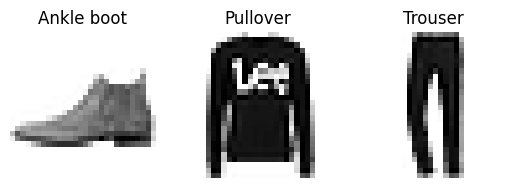

In [ ]:

for index,_ in enumerate(X_new):
  plt.subplot(1,3,index+1)
  plt.imshow(X_new[index],cmap='binary',interpolation='nearest')
  plt.axis('off')
  plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [ ]:
tf.random.set_seed(42)
norm_layer=tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model=tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history=model.fit(X_train,y_train,epochs=20,
                  validation_data=(X_valid,y_valid))
mse_test,rmse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 0.7911 - root_mean_squared_error: 0.8894 - val_loss: 0.5689 - val_root_mean_squared_error: 0.7542
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3788 - root_mean_squared_error: 0.6154 - val_loss: 2.6107 - val_root_mean_squared_error: 1.6158
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3727 - root_mean_squared_error: 0.6105 - val_loss: 0.3244 - val_root_mean_squared_error: 0.5696
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3411 - root_mean_squared_error: 0.5841 - val_loss: 0.8562 - val_root_mean_squared_error: 0.9253
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3314 - root_mean_squared_error: 0.5757 - val_loss: 1.5626 - val_root_mean_squared_error: 1.2501
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3356 - root_mean_squared_error: 0.5793 - val_loss: 0.4035 - val_

In [ ]:
rmse_test

0.5304820537567139

In [ ]:
y_pred

array([[0.47450465],
       [0.99540895],
       [5.0414405 ]], dtype=float32)

#Functional API

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
normalization_layer=tf.keras.layers.Normalization()
hidden_layer1=tf.keras.layers.Dense(30,activation='relu')
hidden_layer2=tf.keras.layers.Dense(30,activation='relu')
concat_layer=tf.keras.layers.Concatenate()
output_layer=tf.keras.layers.Dense(1)

input_=tf.keras.layers.Input(shape=X_train.shape[1:])
normalized=normalization_layer(input_)
hidden1=hidden_layer1(normalized)
hidden2=hidden_layer2(hidden1)
concat=concat_layer([normalized,hidden2])
output=output_layer(concat)

model=tf.keras.Model(inputs=[input_],outputs=[output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']           

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['RootMeanSquaredError'])
normalization_layer.adapt(X_train)
history=model.fit(X_train,y_train,epochs=20,
                  validation_data=(X_valid,y_valid))


Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.9517 - root_mean_squared_error: 0.9756 - val_loss: 1.6882 - val_root_mean_squared_error: 1.2993
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4476 - root_mean_squared_error: 0.6690 - val_loss: 1.1919 - val_root_mean_squared_error: 1.0917
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4109 - root_mean_squared_error: 0.6410 - val_loss: 0.7781 - val_root_mean_squared_error: 0.8821
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3804 - root_mean_squared_error: 0.6168 - val_loss: 0.5493 - val_root_mean_squared_error: 0.7411
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3716 - root_mean_squared_error: 0.6096 - val_loss: 2.4325 - val_root_mean_squared_error: 1.5596
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3752 - root_mean_squared_error: 0.6125 - val_loss: 1.8393 - val_

In [ ]:
mse_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3124 - root_mean_squared_error: 0.5589


In [ ]:
y_pred=model.predict(X_new)
y_pred

1/1 [==============================] - 0s 75ms/step


array([[0.57003343],
       [1.3114316 ],
       [4.5106792 ]], dtype=float32)

In [ ]:
input_wide=tf.keras.layers.Input(shape=[5]) #from 0 to 4
input_deep=tf.keras.layers.Input(shape=[6]) #from 2 to 7
norm_layer_wide=tf.keras.layers.Normalization()
norm_layer_deep=tf.keras.layers.Normalization()
norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)
hidden1=tf.keras.layers.Dense(30,activation='relu')(norm_deep)
hidden2=tf.keras.layers.Dense(30,activation='relu')(hidden1)
concat=tf.keras.layers.concatenate([norm_wide,hidden2])
output=tf.keras.layers.Dense(1)(concat)
model=tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output])

In [ ]:
X_train_wide.shape, X_train_deep.shape

NameError: name 'X_train_wide' is not defined

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])

X_train_wide,X_train_deep=X_train[:,:5],X_train[:,2:]
X_valid_wide,X_valid_deep=X_valid[:,:5],X_valid[:,2:]
X_test_wide,X_test_deep=X_test[:,:5],X_test[:,2:]
X_new_wide,X_new_deep=X_test_wide[:3],X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history=model.fit([X_train_wide,X_train_deep],y_train,epochs=20,validation_data=([X_valid_wide,X_valid_deep],y_valid))

mse_test=model.evaluate((X_test_wide,X_test_deep),y_test)

y_pred=model.predict([X_new_wide,X_new_deep])

In [ ]:
input_wide=tf.keras.layers.Input(shape=[5])
input_deep=tf.keras.layers.Input(shape=[6])
norm_layer_wide=tf.keras.layers.Normalization()
norm_layer_deep=tf.keras.layers.Normalization()
norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)
hidden1=tf.keras.layers.Dense(30,activation='relu')(norm_deep)
hidden2=tf.keras.layers.Dense(30,activation='relu')(hidden1)
concat=tf.keras.layers.concatenate([norm_wide,hidden2])
output=tf.keras.layers.Dense(1)(concat)
aux_output=tf.keras.layers.Dense(1)(hidden2)
model=tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output,aux_output])

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=('mse','mse'),
              loss_weights=(0.9,0.1),
              optimizer=optimizer,
              metrics=['RootMeanSquaredError'])


In [ ]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history=model.fit([X_train_wide,X_train_deep],[y_train,y_train],epochs=20,
                  validation_data=([X_valid_wide,X_valid_deep],[y_valid,y_valid]))

In [ ]:
eval_results=model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))
weighted_sum_of_losses,main_loss,aux_loss,main_rmse,aux_rmse=eval_results

In [ ]:
eval_results

#Using the Subclassing API to Build Dynamic Models

In [ ]:
class WideAndDeepModel(tf.keras.Model):
  def __init__(self,units=30,activation='relu',**kwargs):  #**kwargs elave argument ucundur.
    super().__init__(**kwargs)
    self.norm_layer_wide=tf.keras.layers.Normalization()
    self.norm_layer_deep=tf.keras.layers.Normalization()
    self.hidden1=tf.keras.layers.Dense(units,activation=activation)
    self.hidden2=tf.keras.layers.Dense(units,activation=activation)
    self.main_output=tf.keras.layers.Dense(1)
    self.aux_output=tf.keras.layers.Dense(1)

  def call(self,inputs):
    input_wide,input_deep=inputs
    norm_wide=self.norm_layer_wide(input_wide)
    norm_deep=self.norm_layer_deep(input_deep)
    hidden1=self.hidden1(norm_deep)
    hidden2=self.hidden2(hidden1)
    concat=tf.keras.layers.concatenate([norm_wide,hidden2])
    output=self.main_output(concat)
    aux_output=self.aux_output(hidden2)
    return output,aux_output

tf.random.set_seed(42)
model=WideAndDeepModel(30,activation='relu',name='my_cool_model')

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse',
              loss_weights=[0.9,0.1,],
              optimizer=optimizer,
              metrics=['RootMeanSquaredError'])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history=model.fit([X_train_wide,X_train_deep],[y_train,y_train],
                  epochs=10,
                  validation_data=([X_valid_wide,X_valid_deep],[y_valid,y_valid]))
eval_results=model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))
weighted_sum_of_losses,main_loss,aux_loss,main_rmse,aux_rmse=eval_results

#Saving and Restoring Model

In [ ]:
import shutil
shutil.rmtree('my_keras_model',ignore_errors=True)

In [ ]:
model.save('my_keras_model',save_format='tf')

In [ ]:
from pathlib import Path
for path in sorted(Path('my_keras_model').glob('**/*')):
  print(path)

In [ ]:
model=tf.keras.models.load_model('my_keras_model')
y_pred_main,y_pred_aux=model.predict((X_new_wide,X_new_deep))

In [ ]:
y_pred_main

#Using CallBacks

In [ ]:
shutil.rmtree('my_checkpoints',ignore_errors=True)

In [ ]:
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint('my_checkpoints',
                                            save_weights_only=True)
history=model.fit(
    [X_train_wide,X_train_deep],[y_train,y_train],
    epochs=10,
    validation_data=([X_valid_wide,X_valid_deep],[y_valid,y_valid]),
    callbacks=[checkpoint_cb])

In [ ]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=10,
                                                   restore_best_weights=True)
history=model.fit(
    [X_train_wide,X_train_deep],[y_train,y_train],
    epochs=100,
    validation_data=([X_valid_wide,X_valid_deep],[y_valid,y_valid]),
    callbacks=[checkpoint_cb,early_stopping_cb]
)

In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    ratio=logs['val_loss']/logs['loss']
    print(f'Epoch={epoch},val/train={ratio:.2f}')

In [ ]:
val_train_ratio_cb=PrintValTrainRatioCallback()
history=model.fit(
    [X_train_wide,X_train_deep],[y_train,y_train],
    epochs=10,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[val_train_ratio_cb],verbose=0)  #verbose ne qeder melumat vermesini gosterir.

#Using TensorBoard for Visualisation

In [ ]:
from urllib.request import install_opener
import sys
if 'google.colab' in sys.modules:
  %pip install -q -U tensorboard-plugin-profile

In [ ]:
shutil.rmtree('my_logs',ignore_errors=True)

In [ ]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir='my_logs'):
  return Path(root_logdir)/strftime('run_%Y_%m_%d_%H_%M_%S')

run_logdir=get_run_logdir()

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer=tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model=tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss='mse',
                      optimizer=optimizer,
                      metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)


In [ ]:
tensorboard_cb=tf.keras.callbacks.TensorBoard(run_logdir,
                                              profile_batch=(100,200))
history=model.fit(X_train,y_train,epochs=20,
                  validation_data=(X_valid,y_valid),
                  callbacks=[tensorboard_cb])

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
print('my_logs')
for path in sorted(Path('my_logs').glob('**/*')):
  print(' '* (len(path.parts)-1)+path.parts[-1])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

#Fine-Tuning Neural Network Hyperparameters

In [ ]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
if 'google.colab' in sys.modules:
  %pip install -q -U keras_tuner   #GtridSearchCv'nin tensorflow'du.

In [ ]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [ ]:
random_search_tuner=kt.RandomSearch(
    build_model,objective='val_accuracy',max_trials=5,overwrite=True,
    directory='my_fashion_mnist',project_name='my_rnd_search',seed=42)
random_search_tuner.search(X_train,y_train,epochs=10,
                           validation_data=(X_valid,y_valid))